Starting City: Sambhajinagar
Travel from Sambhajinagar to New Delhi Distance: 2.23606797749979
Distances to other unvisited cities from New Delhi :
- Distance to Pune : 1.4142135623730951
- Distance to Mumbai : 6.082762530298219

Travel from New Delhi to Pune Distance: 1.4142135623730951
Distances to other unvisited cities from Pune :
- Distance to Mumbai : 7.280109889280518

Travel from Pune to Mumbai Distance: 7.280109889280518
Distances to other unvisited cities from Mumbai :

Travel from Mumbai back to Sambhajinagar Distance: 7.0710678118654755
Total tour distance: 18.00145924101888
Tour: [{'x': 2, 'y': 3, 'visited': True, 'name': 'Sambhajinagar'}, {'x': 3, 'y': 1, 'visited': True, 'name': 'New Delhi'}, {'x': 2, 'y': 0, 'visited': True, 'name': 'Pune'}, {'x': 9, 'y': 2, 'visited': True, 'name': 'Mumbai'}, {'x': 2, 'y': 3, 'visited': True, 'name': 'Sambhajinagar'}]


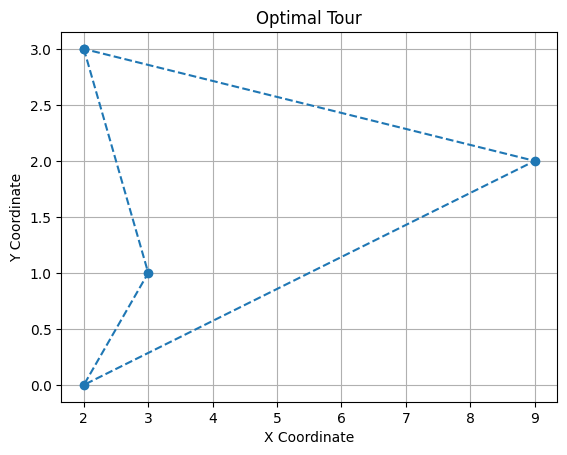

In [8]:
import random
import math
import matplotlib.pyplot as plt

def nearest_neighbor_tsp(cities):
    current_city = randomly_select_starting_city(cities)
    print('Starting City:', current_city['name'])
    tour = [current_city]
    mark_city_as_visited(current_city)
    total_distance = 0
    
    while unvisited_cities_exist(cities):
        nearest_city = find_nearest_unvisited_city(current_city, cities)
        tour.append(nearest_city)
        mark_city_as_visited(nearest_city)
        distance = calculate_distance(current_city, nearest_city)
        total_distance += distance
        print("Travel from", current_city['name'], "to", nearest_city['name'], "Distance:",distance)
        print("Distances to other unvisited cities from", nearest_city['name'], ":")
        for city in cities:
            if not city['visited']:
                distance_to_city = calculate_distance(nearest_city, city)
                print("- Distance to", city['name'], ":",distance_to_city)
        print()
        current_city = nearest_city
    
    tour.append(tour[0])
    print("Travel from", nearest_city['name'], "back to", tour[0]['name'], "Distance:",calculate_distance(nearest_city, tour[0]))
    total_distance += calculate_distance(nearest_city, tour[0])
    print("Total tour distance:", total_distance)
    return tour

def randomly_select_starting_city(cities):
    return random.choice(cities)

def unvisited_cities_exist(cities):
    return any(city['visited'] == False for city in cities)

def find_nearest_unvisited_city(current_city, cities):
    nearest_distance = float('inf')
    nearest_city = None
    for city in cities:
        if not city['visited']:
            distance = calculate_distance(current_city, city)
            if distance < nearest_distance:
                nearest_distance = distance
                nearest_city = city
    return nearest_city

def mark_city_as_visited(city):
    city['visited'] = True
    
def calculate_distance(city1, city2):
    return math.sqrt((city2['x'] - city1['x'])**2 + (city2['y'] - city1['y'])**2)

cities = [
    {'x': 2, 'y': 0, 'visited': False, 'name' : 'Pune'},
    {'x': 9, 'y': 2, 'visited': False, 'name' : 'Mumbai'},
    {'x': 3, 'y': 1, 'visited': False, 'name' : 'New Delhi'},
    {'x': 2, 'y': 3, 'visited': False, 'name' : 'Sambhajinagar'}
]

tour = nearest_neighbor_tsp(cities)
print("Tour:", tour)

x_coords = [city['x'] for city in tour]
y_coords = [city['y'] for city in tour]

plt.plot(x_coords, y_coords, marker='o', linestyle='--')
plt.title('Optimal Tour')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()